# Clustering

# Análisis Exploratorio de Datos

#### Contexto

#### Objetivo

Encontrar cómo se agrupan los países de acuerdo a el porcentaje de población que vive en hogares que tienen una instalación de lavado de manos con agua y jabón en el hogar respecto a la cantidad de muertes y contagios por Covid-19 durante el año 2020

In [1]:
# Librerías a utlizar

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('clustering_dataset.csv')
data.head()

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,percentage_handwashing_facility_2020
0,0,2020-12-14,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia,9.013779,38
1,1,2020-12-13,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia,7.052776,38
2,2,2020-12-12,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia,6.868768,38
3,3,2020-11-12,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia,7.134266,38
4,4,2020-10-12,10,12,2020,202,16,Afghanistan,AFG,38041757.0,Asia,6.968658,38


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15302 entries, 0 to 15301
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Unnamed: 0                                                  15302 non-null  int64  
 1   dateRep                                                     15302 non-null  object 
 2   day                                                         15302 non-null  int64  
 3   month                                                       15302 non-null  int64  
 4   year                                                        15302 non-null  int64  
 5   cases                                                       15302 non-null  int64  
 6   deaths                                                      15302 non-null  int64  
 7   countriesAndTerritories                                     15302 non-null  object 
 

In [4]:
# Elimino la columna del índice y año
data=data.drop(['Unnamed: 0', 'year','countryterritoryCode'], axis=1)

In [5]:
data.columns

Index(['dateRep', 'day', 'month', 'cases', 'deaths', 'countriesAndTerritories',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000',
       'percentage_handwashing_facility_2020'],
      dtype='object')

In [6]:
data.columns = ['date', 'day', 'month','cases', 'deaths', 'country', 'population', 'continent', 'comulative_days','handwashing_facilities']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15302 entries, 0 to 15301
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    15302 non-null  object 
 1   day                     15302 non-null  int64  
 2   month                   15302 non-null  int64  
 3   cases                   15302 non-null  int64  
 4   deaths                  15302 non-null  int64  
 5   country                 15302 non-null  object 
 6   population              15302 non-null  float64
 7   continent               15302 non-null  object 
 8   comulative_days         15302 non-null  float64
 9   handwashing_facilities  15302 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.2+ MB


<AxesSubplot:>

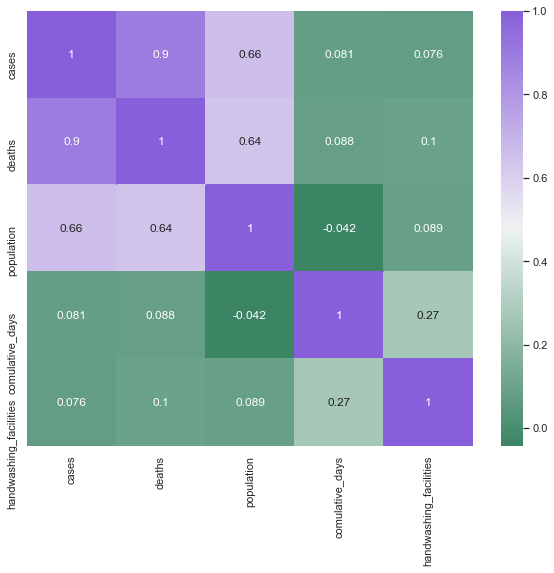

In [31]:
dcorr = data.loc[:,['cases', 'deaths','population','comulative_days','handwashing_facilities']]
f, ax = plt.subplots(figsize=(10, 8))
corr = dcorr.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(150, 275, as_cmap=True), annot=True)

In [9]:
totals_country = data.groupby(['country', 'population', 'continent','handwashing_facilities']).agg(
                                  {'deaths':'sum', 
                                   'cases':'sum'
                                  }).reset_index()

In [10]:
totals_country.head()

,country,population,continent,handwashing_facilities,deaths,cases
0,Afghanistan,38041757.0,Asia,38,1971,49273
1,Algeria,43053054.0,Africa,85,2596,92102
2,Angola,31825299.0,Africa,27,369,16180
3,Armenia,2957728.0,Europe,95,2503,148682
4,Bangladesh,163046173.0,Asia,58,7047,490485


In [11]:
totals_country["total_cases_per_million"] = totals_country["cases"]/ (totals_country["population"]/1000000)
totals_country["total_deaths_per_million"] = totals_country["deaths"]/ (totals_country["population"]/1000000)
totals_country

,country,population,continent,handwashing_facilities,deaths,cases,total_cases_per_million,total_deaths_per_million
0,Afghanistan,3.804176e+07,Asia,38,1971,49273,1295.234602,51.811487
1,Algeria,4.305305e+07,Africa,85,2596,92102,2139.267519,60.297697
2,Angola,3.182530e+07,Africa,27,369,16180,508.400565,11.594549
3,Armenia,2.957728e+06,Europe,95,2503,148682,50268.990252,846.257668
4,Bangladesh,1.630462e+08,Asia,58,7047,490485,3008.258280,43.220886
5,Belize,3.903510e+05,America,90,195,9291,23801.655433,499.550405
6,Benin,1.180115e+07,Africa,12,44,3084,261.330441,3.728450
7,Bhutan,7.630940e+05,Asia,92,0,435,570.047727,0.000000
8,Burundi,1.153058e+07,Africa,6,1,724,62.789572,0.086726
9,Cambodia,1.648654e+07,Asia,74,0,359,21.775337,0.000000


In [12]:
totals_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   55 non-null     object 
 1   population                55 non-null     float64
 2   continent                 55 non-null     object 
 3   handwashing_facilities    55 non-null     int64  
 4   deaths                    55 non-null     int64  
 5   cases                     55 non-null     int64  
 6   total_cases_per_million   55 non-null     float64
 7   total_deaths_per_million  55 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 3.6+ KB


In [13]:
totals_country.describe()

,population,handwashing_facilities,deaths,cases,total_cases_per_million,total_deaths_per_million
count,5.500000e+01,55.000000,55.000000,5.500000e+01,55.000000,55.000000
mean,6.234855e+07,53.400000,5307.836364,2.928779e+05,7243.439951,129.842277
std,1.878255e+08,33.354771,19974.300710,1.337746e+06,13652.007241,231.441579
min,3.903510e+05,5.000000,0.000000,3.590000e+02,21.775337,0.000000
25%,7.563499e+06,22.500000,109.500000,5.908500e+03,515.902684,8.000623
50%,1.648654e+07,58.000000,349.000000,1.823900e+04,1211.050205,21.415823
75%,4.293315e+07,85.500000,1961.500000,1.140320e+05,7958.529297,97.657906
max,1.366418e+09,100.000000,143355.000000,9.884100e+06,66445.188064,933.810364


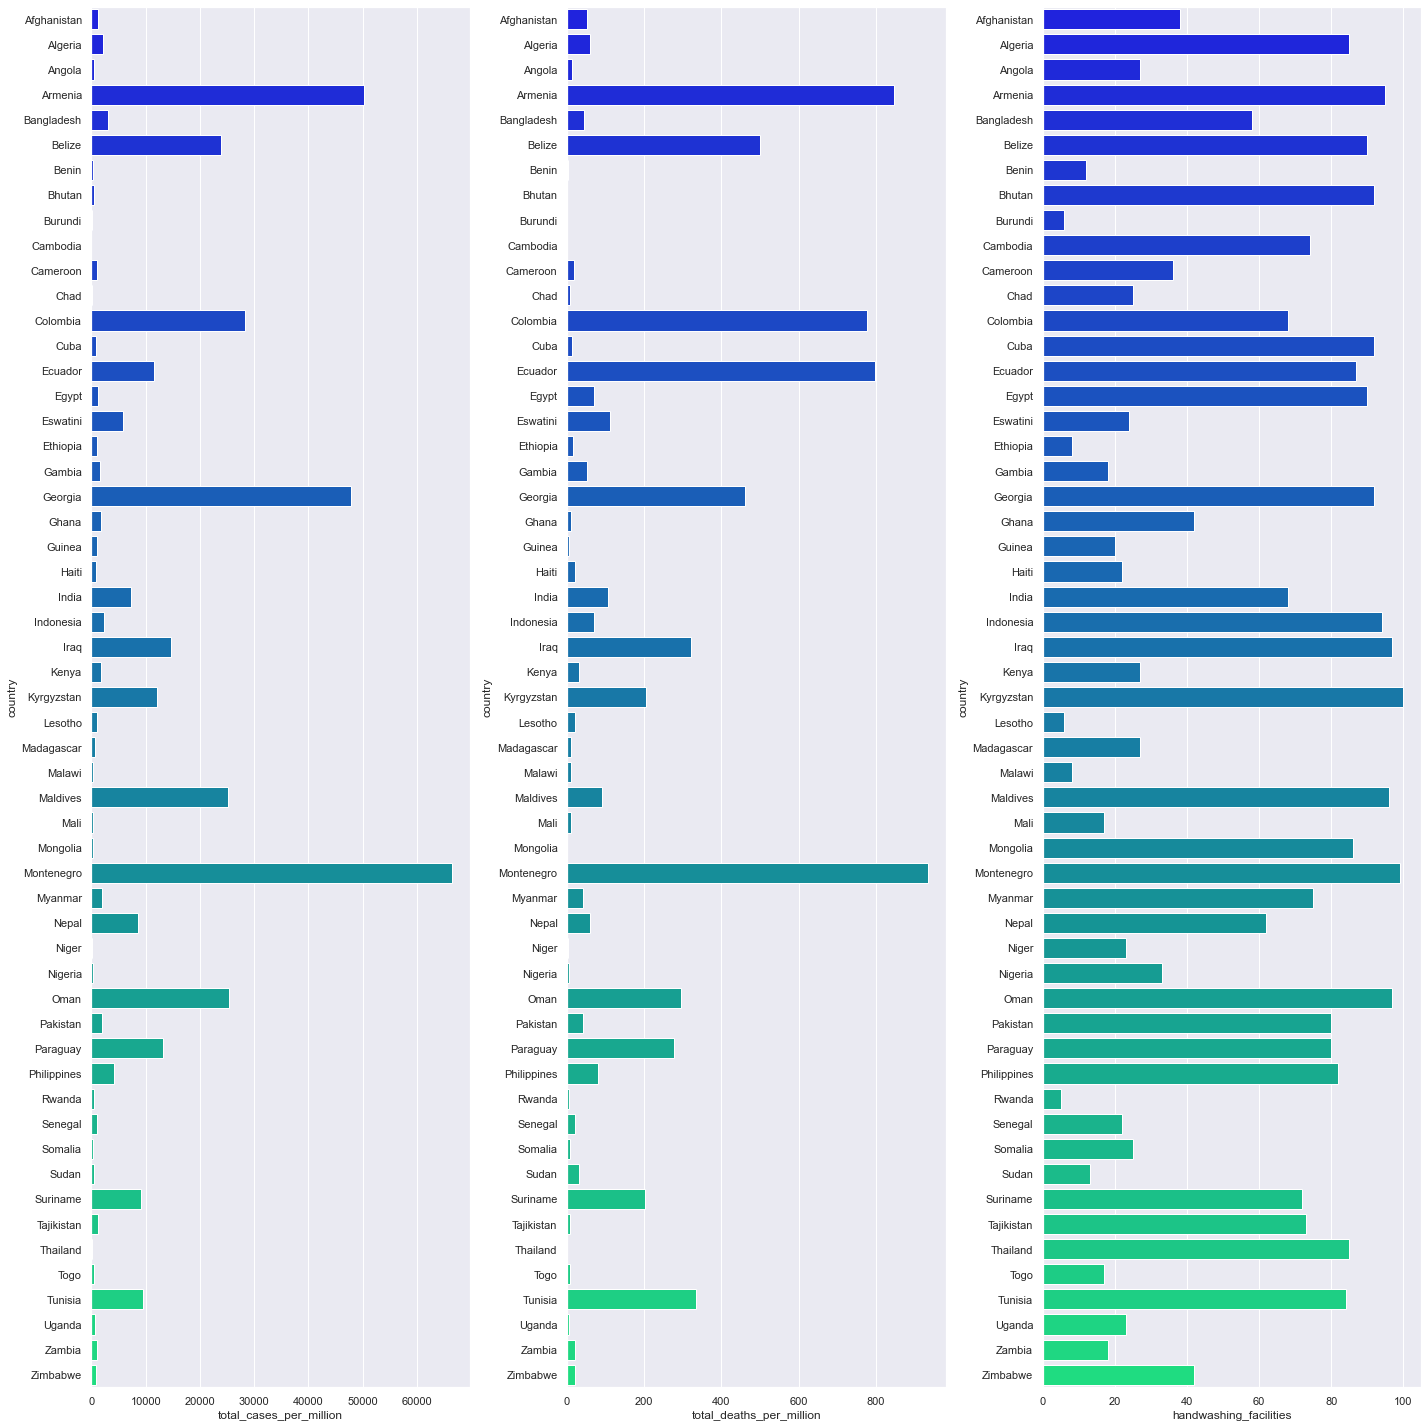

In [14]:
# Gráfico de distribución para cada variable categórica

sns.set()
fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

sns.barplot(ax=ax[0], data = totals_country, y= "country", x="total_cases_per_million", palette="winter")

sns.barplot(ax=ax[1], data = totals_country, y= "country", x="total_deaths_per_million", palette="winter")

sns.barplot(ax=ax[2], data = totals_country, y= "country", x="handwashing_facilities", palette="winter")

fig.set_size_inches(20,20)
plt.tight_layout()
plt.show()

<AxesSubplot:>

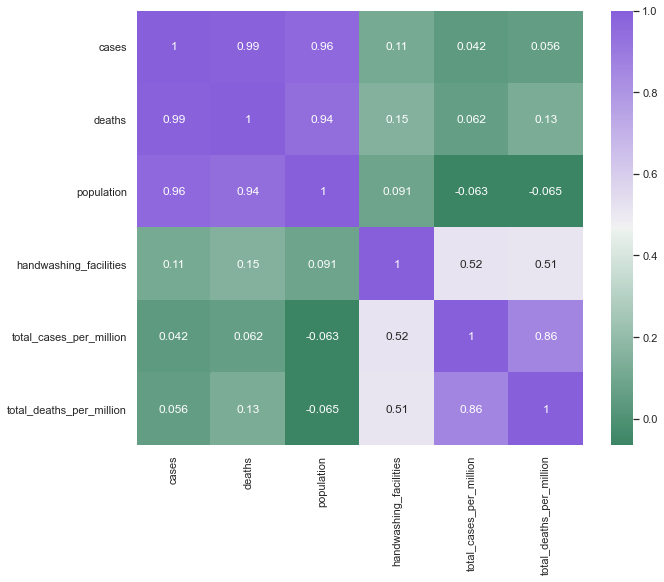

In [33]:
dcorr = totals_country.loc[:,['cases', 'deaths','population','handwashing_facilities', 'total_cases_per_million', 'total_deaths_per_million']]
f, ax = plt.subplots(figsize=(10, 8))
corr = dcorr.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(150, 275, as_cmap=True), annot=True)

# Método del codo para determinar el número de clusters

In [16]:
totals_country.columns

Index(['country', 'population', 'continent', 'handwashing_facilities',
       'deaths', 'cases', 'total_cases_per_million',
       'total_deaths_per_million'],
      dtype='object')

In [17]:
data_modelo = totals_country.drop(['country', 'continent'],axis=1)

In [18]:
import numpy as np
from sklearn.cluster import KMeans

# Preparamos una lista donde vamos a ir agregando las distancias medias
Sum_of_squared_distances = []
# Fiteammos un modelo para cada numero de cluster que queremos testear
K = np.arange(2,14)
for k in K:
    # Definimos y entrenamos el modelo
    km = KMeans(n_clusters=k)
    km = km.fit(data_modelo)
    # Calculamos la distancia media y agregamos a la lista
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,data_modelo.shape[0])
    Sum_of_squared_distances.append(distancia_media)

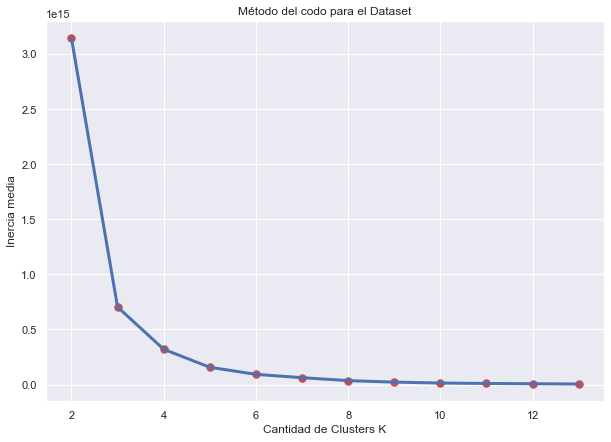

In [19]:
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo para el Dataset')

plt.show()

# Aplicación algoritmo K-means

In [20]:
from sklearn.cluster import KMeans

## Number of clusters, in this case 4 clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_modelo)
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset
data_modelo['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(data_modelo.groupby('cluster').mean(),1))

## Identificación de los valores promedio (centroides) 
kmeans_mean_cluster

,population,handwashing_facilities,deaths,cases,total_cases_per_million,total_deaths_per_million
cluster,,,,,,
1,1.335621e+07,51.2,1202.4,53581.2,8541.6,144.1
2,1.366418e+09,68.0,143355.0,9884100.0,7233.6,104.9
3,2.128002e+08,66.2,8973.8,405566.8,1922.7,39.9
4,6.773037e+07,55.6,6458.7,245866.9,4180.0,111.1


#### Concateno los datasets

In [21]:
data_clusters=pd.concat([totals_country
                         [['country', 'continent']],data_modelo],axis=1)
data_clusters.head(10)

,country,continent,population,handwashing_facilities,deaths,cases,total_cases_per_million,total_deaths_per_million,cluster
0,Afghanistan,Asia,38041757.0,38,1971,49273,1295.234602,51.811487,1
1,Algeria,Africa,43053054.0,85,2596,92102,2139.267519,60.297697,4
2,Angola,Africa,31825299.0,27,369,16180,508.400565,11.594549,1
3,Armenia,Europe,2957728.0,95,2503,148682,50268.990252,846.257668,1
4,Bangladesh,Asia,163046173.0,58,7047,490485,3008.258280,43.220886,3
5,Belize,America,390351.0,90,195,9291,23801.655433,499.550405,1
6,Benin,Africa,11801151.0,12,44,3084,261.330441,3.728450,1
7,Bhutan,Asia,763094.0,92,0,435,570.047727,0.000000,1
8,Burundi,Africa,11530577.0,6,1,724,62.789572,0.086726,1
9,Cambodia,Asia,16486542.0,74,0,359,21.775337,0.000000,1


#### Se muestran los resultados de cada cluster

In [22]:
for i in range(1,5):
    print('Países incluídos en el grupo {}'.format(str(i)))
    print(list(data_clusters[data_clusters.cluster==i]['country'].values))

Países incluídos en el grupo 1
['Afghanistan', 'Angola', 'Armenia', 'Belize', 'Benin', 'Bhutan', 'Burundi', 'Cambodia', 'Cameroon', 'Chad', 'Cuba', 'Ecuador', 'Eswatini', 'Gambia', 'Georgia', 'Ghana', 'Guinea', 'Haiti', 'Iraq', 'Kyrgyzstan', 'Lesotho', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mongolia', 'Montenegro', 'Nepal', 'Niger', 'Oman', 'Paraguay', 'Rwanda', 'Senegal', 'Somalia', 'Suriname', 'Tajikistan', 'Togo', 'Tunisia', 'Zambia', 'Zimbabwe']
Países incluídos en el grupo 2
['India']
Países incluídos en el grupo 3
['Bangladesh', 'Indonesia', 'Nigeria', 'Pakistan']
Países incluídos en el grupo 4
['Algeria', 'Colombia', 'Egypt', 'Ethiopia', 'Kenya', 'Myanmar', 'Philippines', 'Sudan', 'Thailand', 'Uganda']


# Cluster Jerárquico

In [23]:
data_jerarquico = totals_country.drop(['country', 'continent'],axis=1)

In [24]:
data_jerarquico.head()

,population,handwashing_facilities,deaths,cases,total_cases_per_million,total_deaths_per_million
0,38041757.0,38,1971,49273,1295.234602,51.811487
1,43053054.0,85,2596,92102,2139.267519,60.297697
2,31825299.0,27,369,16180,508.400565,11.594549
3,2957728.0,95,2503,148682,50268.990252,846.257668
4,163046173.0,58,7047,490485,3008.258280,43.220886


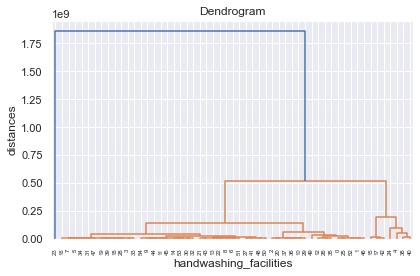

In [25]:
import scipy.cluster.hierarchy as sch

# creando el Dendograma 
dendrogram = sch.dendrogram(sch.linkage(data_jerarquico, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('handwashing_facilities')
plt.ylabel('distances')
plt.tight_layout()
plt.show()

## Definición de clusters y evaluación

In [26]:
from sklearn.cluster import AgglomerativeClustering 

# creando los grupos
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_jerarquico)

#### Concateno los datasets

In [27]:
cluster_hc=pd.concat([totals_country[['country', 'continent']],data_jerarquico],axis=1)
cluster_hc.head(10)

,country,continent,population,handwashing_facilities,deaths,cases,total_cases_per_million,total_deaths_per_million
0,Afghanistan,Asia,38041757.0,38,1971,49273,1295.234602,51.811487
1,Algeria,Africa,43053054.0,85,2596,92102,2139.267519,60.297697
2,Angola,Africa,31825299.0,27,369,16180,508.400565,11.594549
3,Armenia,Europe,2957728.0,95,2503,148682,50268.990252,846.257668
4,Bangladesh,Asia,163046173.0,58,7047,490485,3008.258280,43.220886
5,Belize,America,390351.0,90,195,9291,23801.655433,499.550405
6,Benin,Africa,11801151.0,12,44,3084,261.330441,3.728450
7,Bhutan,Asia,763094.0,92,0,435,570.047727,0.000000
8,Burundi,Africa,11530577.0,6,1,724,62.789572,0.086726
9,Cambodia,Asia,16486542.0,74,0,359,21.775337,0.000000


In [28]:
heirarchy=cluster_hc.copy()
heirarchy['cluster'] = y_hc

In [29]:
# Aca se anota el numero de clústers si se desea poner de forma manual 
for i in range(4):
    print('**Name of countries in cluster {}**'.format(str(i)))
    print(list(heirarchy[heirarchy.cluster==i]['country'].values))

**Name of countries in cluster 0**
['Afghanistan', 'Algeria', 'Angola', 'Armenia', 'Belize', 'Benin', 'Bhutan', 'Burundi', 'Cambodia', 'Cameroon', 'Chad', 'Colombia', 'Cuba', 'Ecuador', 'Eswatini', 'Gambia', 'Georgia', 'Ghana', 'Guinea', 'Haiti', 'Iraq', 'Kenya', 'Kyrgyzstan', 'Lesotho', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Mongolia', 'Montenegro', 'Myanmar', 'Nepal', 'Niger', 'Oman', 'Paraguay', 'Rwanda', 'Senegal', 'Somalia', 'Sudan', 'Suriname', 'Tajikistan', 'Thailand', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
**Name of countries in cluster 1**
['Egypt', 'Ethiopia', 'Philippines']
**Name of countries in cluster 2**
['Bangladesh', 'Indonesia', 'Nigeria', 'Pakistan']
**Name of countries in cluster 3**
['India']
